# Bank Marketing Campaign


A equipa de marketing quer lançar uma nova campanha cujo objetivo é convencer os clientes a abrir depósitos a prazo.

Até agora a estratégia era ligar ao máximo número de pessoas, de forma indiscriminada, e tentar vender-lhe o produto. No entanto essa abordagem, para além de gastar mais recursos porque implica ter várias pessoas a ligar a todos os clientes, também é incomóda para alguns clientes que não gostam de ser incomodados com esse tipo de chamadas. Feitas as contas, chegou-se à conclusão que:

    - Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    - Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.
    
Com base nesta informação, conseguem ajudar a equipa de marketing criando um modelo que seleccione os melhores candidatos para serem alvos da campanha, de forma a reduzir custos?


**O dataset contêm informação sobre todos os clientes que foram alvo da campanha:**

    1 - age 
    2 - job : type of job 
    3 - marital : marital status
    4 - education
    5 - default: has credit in default? 
    6 - housing: has housing loan? 
    7 - loan: has personal loan? 
    8 - pdays: number of days that passed by after the client was last contacted from a previous campaign 
    9 - previous: number of contacts performed before this campaign and for this client 
    10 - poutcome: outcome of the previous marketing campaign 
    11 - emp.var.rate: employment variation rate - quarterly indicator 
    12 - cons.price.idx: consumer price index - monthly indicator
    13 - cons.conf.idx: consumer confidence index - monthly indicator 
    14 - euribor3m: euribor 3 month rate - daily indicator 
    15 - nr.employed: number of employees - quarterly indicator 

**Output:**
    
    y: has the client subscribed a term deposit? 
    
   

#### Perguntas:

    1. Quantas features estão disponíveis? Quantos clientes?
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    4. Qual o algoritmo que levou aos melhores resultados?
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    6. Qual é o custo que o banco tem sem nenhum modelo?
    7. Qual o custo que o banco passa a ter com o vosso modelo?
    
    
    
    

In [342]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import  precision_recall_curve, roc_auc_score, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,auc, roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import re
from ast import literal_eval
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.metrics import f1_score

seed = 42

In [240]:
df = pd.read_csv('bank_marketing_campaign.csv')

In [241]:
X=df.copy()

In [242]:
X.shape

(41188, 16)

In [243]:
X.head(2)

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [244]:
X.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [245]:
X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [246]:
X.nunique()

age                78
job                12
marital             4
education           8
default             3
housing             3
loan                3
pdays              27
previous            8
poutcome            3
emp.var.rate       10
cons.price.idx     26
cons.conf.idx      26
euribor3m         316
nr.employed        11
y                   2
dtype: int64

In [247]:
X.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [248]:
print(f'Número de clientes que aderiram ao depósito a prazo : {X["y"].value_counts()[1]}') 
print(f'Número de clientes que não aderiram ao depósito a prazo : {X["y"].value_counts()[0]}')

Número de clientes que aderiram ao depósito a prazo : 4640
Número de clientes que não aderiram ao depósito a prazo : 36548


### Vamos tentar converter o máximo de colunas categóricas em numéricas

In [249]:
X.select_dtypes(include=object).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome',
       'y'],
      dtype='object')

#### job

In [250]:
X.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [251]:
table = pd.crosstab(X['job'], X['y'])
display(table)
chi2, pval, dof, expected=stats.chi2_contingency(table)
print(expected)
print(pval)

y,no,yes
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


[[9247.91822861 1174.08177139]
 [8211.49830048 1042.50169952]
 [1291.97552685  164.02447315]
 [ 940.58657862  119.41342138]
 [2594.59920365  329.40079635]
 [1526.23482568  193.76517432]
 [1260.91842284  160.08157716]
 [3521.87559483  447.12440517]
 [ 776.42760027   98.57239973]
 [5983.37292415  759.62707585]
 [ 899.76867049  114.23132951]
 [ 292.82412353   37.17587647]]
4.189763287563623e-199


pvalue < 0.05 logo job e target são dependentes.

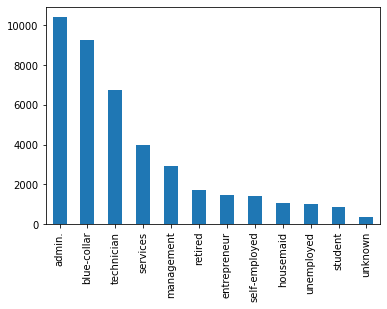

In [252]:
X.job.value_counts().plot(kind='bar');

In [253]:
X.job.mode()

0    admin.
dtype: object

In [254]:
X['job'].replace(to_replace='unknown', value='admin.',regex=True, inplace=True)

In [255]:
X.job.value_counts()

admin.           10752
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: job, dtype: int64

Substituí os valores unknown pela moda do job - admin.

In [256]:
# Tendo em conta que esta feature e a target são dependentes, iremos querer utilizá-la nos modelos a testar. Para isso será
# necessário convertê-la em numérica. Utilizaremos a técnica OHE.
X=pd.get_dummies(X, prefix='job', columns=['job'])

In [257]:
X.head(2)

,age,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,...,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
0,56,married,basic.4y,no,no,no,999,0,nonexistent,1.1,...,0,0,1,0,0,0,0,0,0,0
1,57,married,high.school,unknown,no,no,999,0,nonexistent,1.1,...,0,0,0,0,0,0,1,0,0,0


#### Marital

In [258]:
X.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [259]:
table = pd.crosstab(X['marital'], X['y'])
display(table)
chi2, pval, dof, expected=stats.chi2_contingency(table)
print(expected)
print(pval)

y,no,yes
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


[[4.09243896e+03 5.19561037e+02]
 [2.21197568e+04 2.80824318e+03]
 [1.02648165e+04 1.30318345e+03]
 [7.09876663e+01 9.01233369e+00]]
2.068014648442211e-26


pvalue < 0.05 logo marital e target são dependentes.

In [260]:
X.marital.mode()

0    married
dtype: object

In [261]:
X['marital'].replace(to_replace='unknown', value='married', regex=True, inplace=True)

In [262]:
X.marital.value_counts()

married     25008
single      11568
divorced     4612
Name: marital, dtype: int64

Substituí os valores unknown pela moda do marital - married

In [263]:
# À semelhança da feature job, iremos utilizar OHE para converter esta feature em numérica.
X=pd.get_dummies(X, prefix='marital', columns=['marital'])

In [264]:
X.head(2)

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
0,56,basic.4y,no,no,no,999,0,nonexistent,1.1,93.994,...,0,0,0,0,0,0,0,0,1,0
1,57,high.school,unknown,no,no,999,0,nonexistent,1.1,93.994,...,0,0,0,1,0,0,0,0,1,0


#### education

In [265]:
X.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [266]:
table = pd.crosstab(X['education'], X['y'])
display(table)
chi2, pval, dof, expected=stats.chi2_contingency(table)
print(expected)
print(pval)

y,no,yes
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


[[3.70555618e+03 4.70443819e+02]
 [2.03379664e+03 2.58203360e+02]
 [5.36400554e+03 6.80994464e+02]
 [8.44309556e+03 1.07190444e+03]
 [1.59722249e+01 2.02777508e+00]
 [4.65235418e+03 5.90645819e+02]
 [1.07972240e+04 1.37077595e+03]
 [1.53599563e+03 1.95004370e+02]]
3.3051890144025054e-38


education e target também são dependentes

In [267]:
X.education.mode()

0    university.degree
dtype: object

In [268]:
dic_edu= {'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y':3, 'high.school': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': 6}

In [269]:
X.replace({"education": dic_edu}, inplace=True)
#X.drop(X[X['education']==-1].index, inplace=True)

Como a feature education representa o grau de escolaridade esta é ordinal, podendo assim ser substituida por numeração ordenada. Os valores unknown foram substituidos pela moda da feature (university.degree) já convertida em numérico : 6.

#### default

In [270]:
X.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [271]:
table = pd.crosstab(X['default'], X['y'])
display(table)
chi2, pval, dof, expected=stats.chi2_contingency(table)
print(expected)
print(pval)

y,no,yes
default,,
no,28391,4197
unknown,8154,443
yes,3,0


[[2.89168259e+04 3.67117413e+03]
 [7.62851209e+03 9.68487909e+02]
 [2.66203749e+00 3.37962513e-01]]
5.1619579513916376e-89


In [272]:
X.loc[X.default=='yes']

,age,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single
21580,48,5,yes,no,no,999,0,nonexistent,1.4,93.444,...,0,0,0,0,0,1,0,0,1,0
21581,48,5,yes,yes,no,999,0,nonexistent,1.4,93.444,...,0,0,0,0,0,1,0,0,1,0
24866,31,4,yes,no,no,999,1,failure,-0.1,93.200,...,0,0,0,0,0,0,1,0,1,0


In [273]:
print(f'Percentagem default = no:',X.default.value_counts()[0]/X.shape[0]*100)
print(f'Percentagem default = yes:',X.default.value_counts()[2]/X.shape[0]*100)
print(f'Percentagem default = desconhecido:',X.default.value_counts()[1]/X.shape[0]*100)

Percentagem default = no: 79.12013207730408
Percentagem default = yes: 0.007283674856754395
Percentagem default = desconhecido: 20.87258424783918


Atendendo a que 79% dos valores do default são de uma categoria e que 21% dos valores de default são desconhecidos optamos por eliminar esta coluna.

In [274]:
X.drop(columns=['default'], inplace=True)

#### housing

In [275]:
X.housing.value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [276]:
table = pd.crosstab(X['housing'], X['y'])
display(table)
chi2, pval, dof, expected=stats.chi2_contingency(table)
print(expected)
print(pval)

y,no,yes
housing,,
no,16596,2026
unknown,883,107
yes,19069,2507


[[16524.15402544  2097.84597456]
 [  878.47237059   111.52762941]
 [19145.37360396  2430.62639604]]
0.05829447669453452


In [277]:
X.housing.mode()

0    yes
dtype: object

In [278]:
dic_hou= {'yes': 1, 'no': 0, 'unknown': 0}
X.replace({"housing": dic_hou}, inplace=True)
#X.drop(X[X['housing']==-1].index, inplace=True)

Como feature housing apenas tem 2 categorias podemos substituir por 0 e 1
Note-se que pvalue do chi2 entre a feature housing e a target é > 0.05 o que significa que não se pode afirmar que exista dependência entre as duas. Contudo, iremos manter esta feature e avaliar mais à frente a sua utilidade. s valores unknown foram novamente substituidos pela moda da feature - yes

#### loan

In [279]:
X.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [280]:
table = pd.crosstab(X['loan'], X['y'])
display(table)
chi2, pval, dof, expected=stats.chi2_contingency(table)
print(expected)
print(pval)

y,no,yes
loan,,
no,30100,3850
unknown,883,107
yes,5565,683


[[30125.39089055  3824.60910945]
 [  878.47237059   111.52762941]
 [ 5544.13673886   703.86326114]]
0.5786752870441754


In [281]:
X.loan.mode()

0    no
dtype: object

In [282]:
dic_loan= {'yes': 1, 'no': 0, 'unknown': 0}
X.replace({"loan": dic_loan}, inplace=True)
#X.drop(X[X['loan']==-1].index, inplace=True)

Tal como na feature housing, também a loan tem pvalue > 0.05. Foi utilizado o mesmo critério e passos que na housing.

#### poutcome

In [283]:
X.poutcome.value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [284]:
table = pd.crosstab(X['poutcome'], X['y'])
display(table)
chi2, pval, dof, expected=stats.chi2_contingency(table)
print(expected)
print(pval)

y,no,yes
poutcome,,
failure,3647,605
nonexistent,32422,3141
success,479,894


[[ 3772.99446441   479.00553559]
 [31556.67971254  4006.32028746]
 [ 1218.32582306   154.67417694]]
0.0


In [285]:
X=pd.get_dummies(X, prefix='poutcome', columns=['poutcome'])

À semelhança do que foi feito anteriormente, iremos utilizar OHE para converter esta feature em numérica. Note-se que o resultado do teste chi2 entre esta feature e a target antevê uma grande dependência entre as duas.

#### y

In [286]:
X.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [287]:
dic_target= {'yes': 1, 'no': 0}
X.replace({"y": dic_target}, inplace=True)

Tal como na housing, a target tem apenas 2 categorias que podem ser substituidas por 0 e 1

In [288]:
X.shape

(41188, 29)

In [289]:
#Colocar a nossa target 'y' no final
last_col=X.pop('y')
X.insert(28,'y',last_col)

In [290]:
X.head(2)

,age,education,housing,loan,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,1,0,0,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,1,0,0,1,0,0
1,57,4,0,0,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,1,0,0,1,0,0


### Correlações

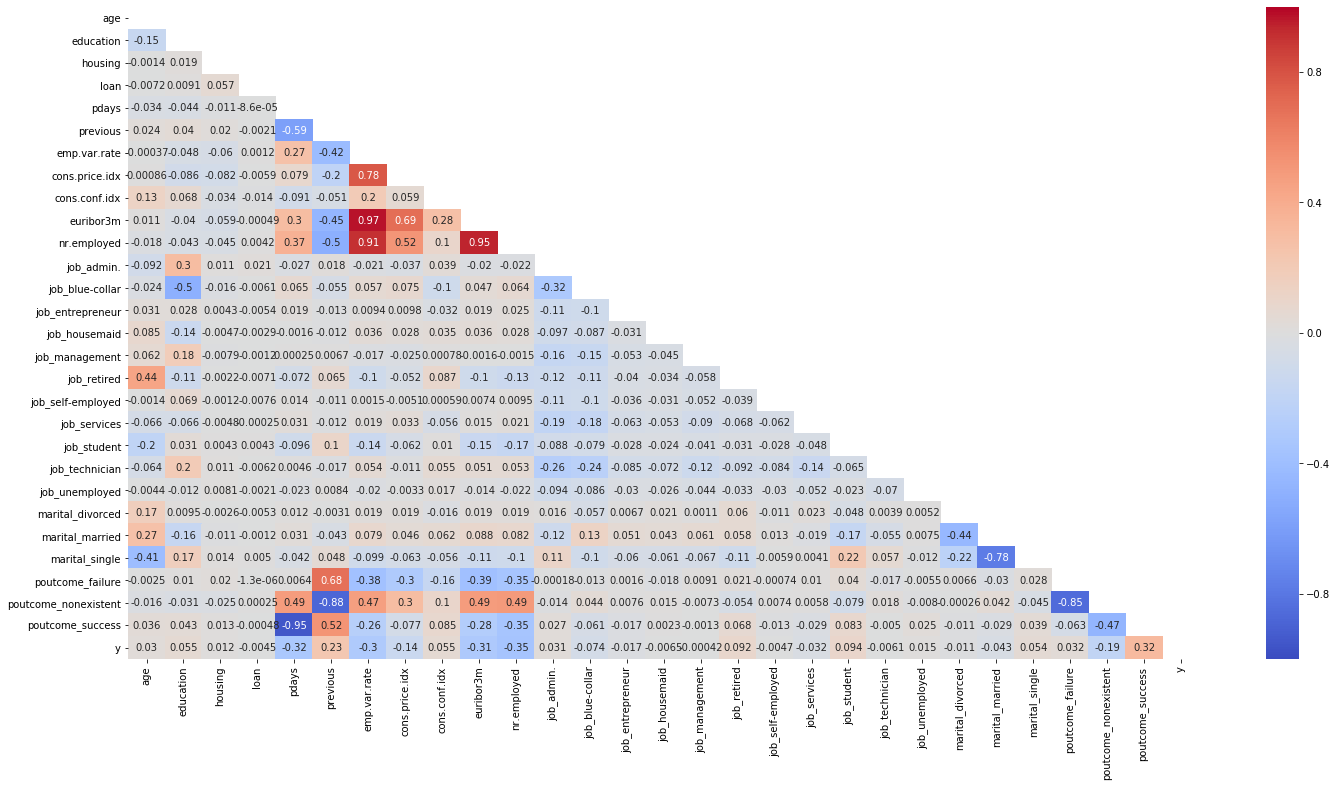

In [291]:
corr=X.corr()
mask = np.triu(corr)
plt.figure(figsize=[24,12])
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [292]:

#X.corr

In [293]:
# Iremos eliminar features que tenham correlação com a target muito baixo. Neste caso assumimos como treshold o valor
# de 0,015, tendo-se eliminado assim todas as features com corr inferior a esse valor.
X.drop(columns=['housing', 'loan', 'job_housemaid', 'job_management', 'job_self-employed','job_technician','job_unemployed', 'marital_divorced'], inplace=True)

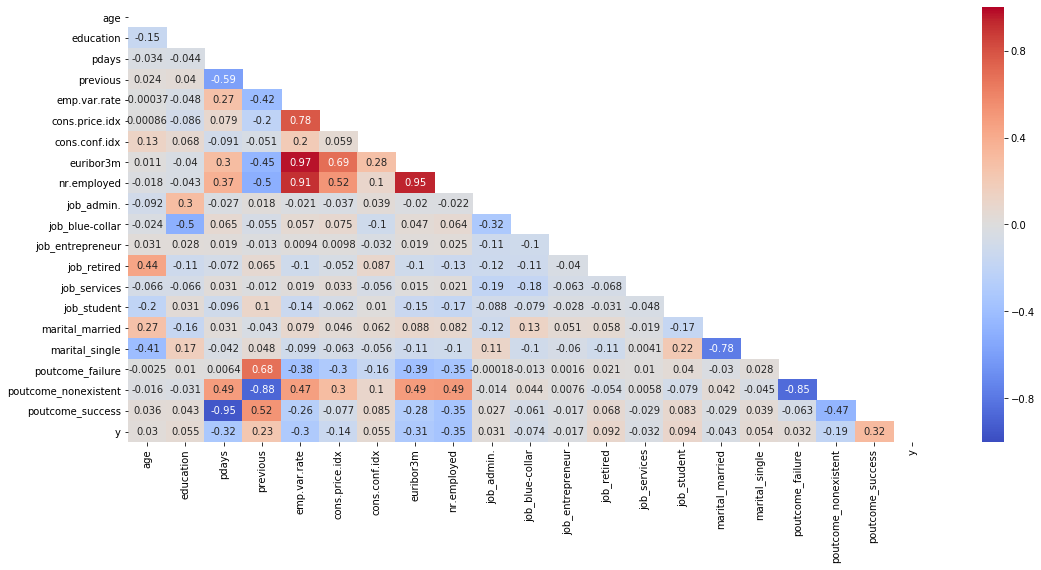

In [294]:
corr=X.corr()
mask = np.triu(corr)
plt.figure(figsize=[18,8])
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [295]:
# Eliminar features com grande correlação entre si (corr superior a 0,9).
# 'emp.var.rate', 'euribor3m' e 'nr.employed' têm elevada correlação entre si. Serão eliminadas as 2 primeiras
# e mantida a 'nr.employed' visto ser aquela que tem maior correlação com a target
# pdays e poutcome_success também têm elevada correlação. Como ambas têm a mesma correlação com a target qualquer
# uma das duas poderia ser eliminada. Optou-se por eliminar o pdays

In [296]:
X.drop(columns=['emp.var.rate', 'euribor3m', 'pdays'], inplace=True)

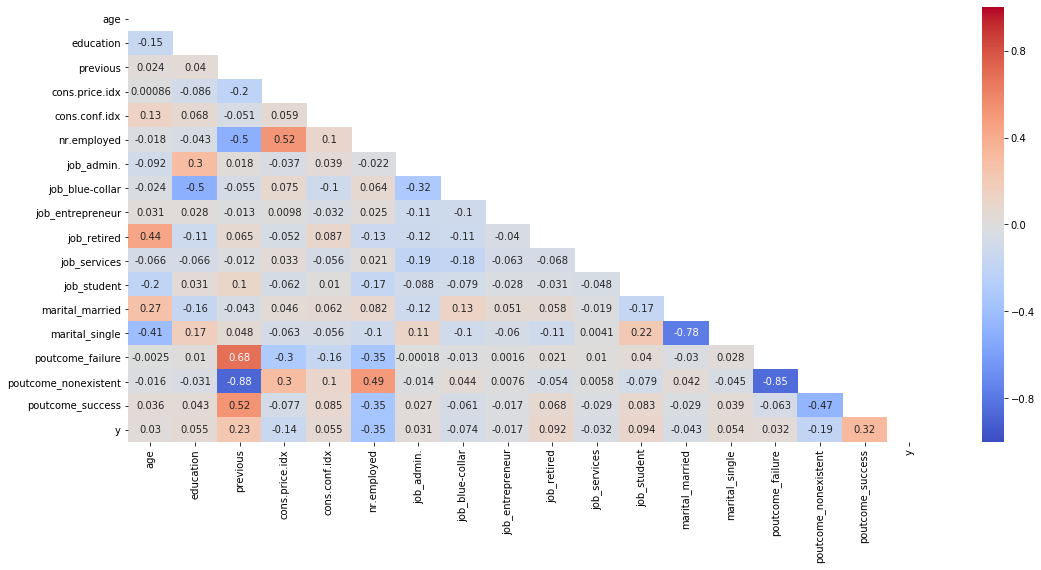

In [297]:
corr=X.corr()
mask = np.triu(corr)
plt.figure(figsize=[18,8])
sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True)

In [298]:
X.shape

(41188, 18)

In [299]:
X.describe()

,age,education,previous,cons.price.idx,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_retired,job_services,job_student,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.238225,0.172963,93.575664,-40.502600,5167.035911,0.261047,0.224677,0.035350,0.041760,0.096363,0.021244,0.607167,0.280859,0.103234,0.863431,0.033335,0.112654
std,10.42125,1.645985,0.494901,0.578840,4.628198,72.251528,0.439211,0.417375,0.184665,0.200042,0.295092,0.144199,0.488386,0.449424,0.304268,0.343396,0.179512,0.316173
min,17.00000,0.000000,0.000000,92.201000,-50.800000,4963.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,3.000000,0.000000,93.075000,-42.700000,5099.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,4.000000,0.000000,93.749000,-41.800000,5191.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,47.00000,6.000000,0.000000,93.994000,-36.400000,5228.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,98.00000,6.000000,7.000000,94.767000,-26.900000,5228.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


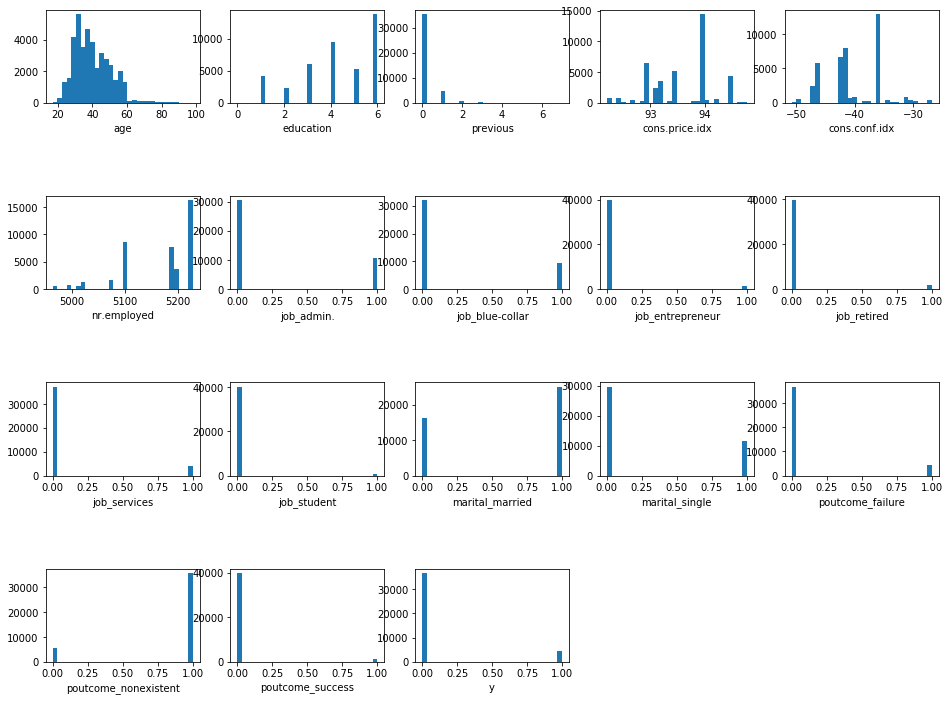

In [300]:
plt.figure(figsize=(16,12))
i=1
for col in X.columns:
    plt.subplot(4,5,i)
    plt.subplots_adjust(hspace=1)
    plt.hist(x=X[col], bins=30)
    plt.xlabel(col)
    i+=1

### Modelos

In [301]:
train_set, test_set = train_test_split(X, test_size = 0.2, random_state = seed)

In [302]:
X_train = train_set.drop(['y'], axis = 'columns')
y_train = train_set['y']

X_test = test_set.drop(['y'], axis = 1)
y_test = test_set['y']

Normalizar

In [303]:
scaler = MinMaxScaler()


features_names = X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features_names)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features_names)

Antes de iniciar, vamos calcular a baseline, ou seja, o custo que temos sem nenhum modelo.

    - Por cada cliente identificado como um bom candidado, e é alvo da campanha mas não adere ao depósito a prazo, o banco tem um custo de 500euros.
    - Por cada cliente que é identificado como mau candidado, e como tal não é alvo da campanha mas na verdade era um bom candidado e iria aderir, o banco tem um custo de 2000euros.

totalCost=500∗FP+2000∗FN

#### No nosso dataset, os clientes que aderiram ao depóstio têm target = 1 e os que não aderiram têm target = 0

In [304]:
# Vamos criar a situação em que o modelo prevê que nenhum cliente adere ao depósito.
y_preds_all_bad = np.zeros(y_test.shape) 

In [305]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 7303
Number of True Positives: 0
Number of False Negatives: 935
Number of False Positives: 0


In [306]:
# Considerando todos os candidatos como maus candidatos:
print('Total Cost:', fn*2000)

Total Cost: 1870000


In [307]:
accuracy_score(y_test, y_preds_all_bad)

0.8865015780529255

In [308]:
# Criando agora a situação em que o modelo prevê que todos os clientes aderem ao depósito.
y_preds_all_bad = np.ones(y_test.shape) 

In [309]:
tn, fp, fn, tp = confusion_matrix(y_test, y_preds_all_bad).ravel()

print('Number of True Negatives:', tn)
print('Number of True Positives:', tp)
print('Number of False Negatives:', fn)
print('Number of False Positives:', fp)

Number of True Negatives: 0
Number of True Positives: 935
Number of False Negatives: 0
Number of False Positives: 7303


In [310]:
# Considerando todos os candidatos como bons candidatos:
print('Total Cost:', fp*500)

Total Cost: 3651500


In [311]:
accuracy_score(y_test, y_preds_all_bad)

0.11349842194707453

Vamos considerar como modelo baseline o de todos os candidatos serem maus candidatos, uma vez que a target está balanceada nesse sentido.
Assim temos que a nossa métrica - custo total - é de 1.870.000€ para a baseline

In [312]:
def total_cost(y_test, y_preds, threshold = 0.5):
    
    tn, fp, fn, tp = confusion_matrix(y_test ==1, y_preds > threshold).ravel()
    
    cost_fn = fn*2000
    cost_fp = fp*500
    
    return cost_fn + cost_fp

In [313]:
def auc_roc_plot(y_test, y_preds):

    fpr, tpr, thresholds = roc_curve(y_test,y_preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [314]:
def min_cost_threshold(y_test, y_preds):
    
    costs = {}
    
    for threshold in np.arange(0, 1.1, 0.1):
        
        costs[round(threshold, 1)] = total_cost(y_test, y_preds, threshold = threshold)
        
    plt.plot(list(costs.keys()), list(costs.values()))
    plt.ylabel('Cost')
    plt.xlabel('Threshold')
    plt.show()

### Regressão Logística

In [315]:
%%time
lr = LogisticRegression(max_iter = 1000, solver = 'lbfgs', random_state = seed, class_weight = 'balanced' )

parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

clf_lr = GridSearchCV(lr, parameters, cv = 5).fit(X_train, y_train)

Wall time: 5.88 s


In [316]:
clf_lr.score(X_test, y_test)

0.7529740228210731

In [317]:
y_preds = clf_lr.predict_proba(X_test)[:,1]

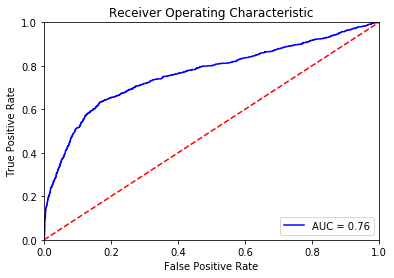

In [318]:
auc_roc_plot(y_test, y_preds)

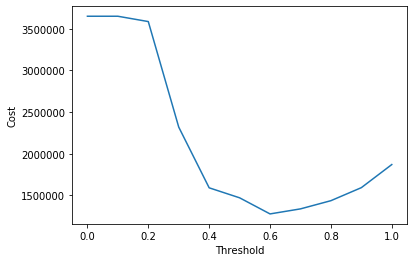

In [319]:
min_cost_threshold(y_test, y_preds)

In [320]:
total_cost(y_test, y_preds, threshold = 0.6)

1277000

### KNN

In [321]:
%%time
knn = KNeighborsClassifier()

parameters = {'n_neighbors': range(1,10, 1)}

clf_knn = GridSearchCV(knn, parameters, cv = 5).fit(X_train, y_train)

Wall time: 58.3 s


In [322]:
y_preds = clf_knn.predict_proba(X_test)[:,1]

clf_knn.score(X_test, y_test)

0.895241563486283

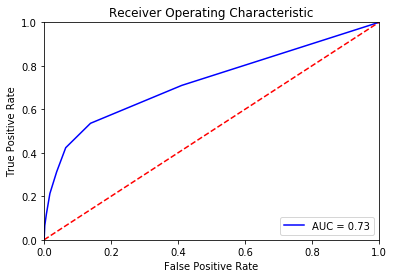

In [323]:
auc_roc_plot(y_test, y_preds)

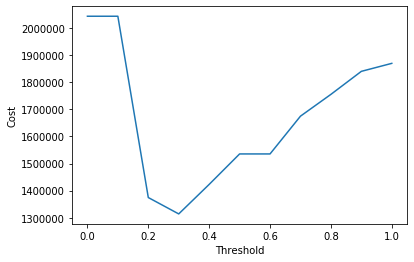

In [324]:
min_cost_threshold(y_test, y_preds)

In [325]:
total_cost(y_test, y_preds, threshold = 0.3)

1314000

### SVM

In [ ]:
#%%time

#svc = SVC(random_state = seed, class_weight = 'balanced', gamma = 'scale', probability = True, verbose = True)

#parameters = {'C':[0.1, 1, 10], 'kernel': ('rbf', 'linear') }


#clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train, y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [91]:
#y_preds = clf_svc.predict_proba(X_test)[:,1]

In [92]:
#clf_svc.score(X_test, y_test)

In [93]:
#auc_roc_plot(y_test, y_preds)

In [94]:
#min_cost_threshold(y_test, y_preds)

In [95]:
#total_cost(y_test, y_preds, threshold = 0.6)

#### Pelo facto de este algoritmo (SVM) demorar muito tempo a correr, optou-se por não o considerar 

### Decision Trees

In [326]:
%%time

trees = tree.DecisionTreeClassifier(random_state = seed,  class_weight = 'balanced').fit(X_train, y_train)

parameters = {'max_depth':[3, 6], 'min_samples_split': [2, 4, 10]}

clf_tree = GridSearchCV(trees, parameters, cv = 5).fit(X_train, y_train)

Wall time: 1.62 s


In [327]:
clf_tree.best_estimator_

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [344]:
y_preds = clf_tree.predict_proba(X_test)[:,1]

clf_tree.score(X_test, y_test)

0.8483855304685604

In [347]:
#f1_score(y_test, y_preds, average='binary')

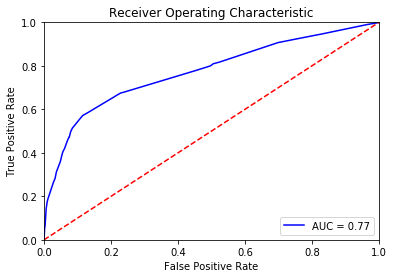

In [329]:
auc_roc_plot(y_test, y_preds)

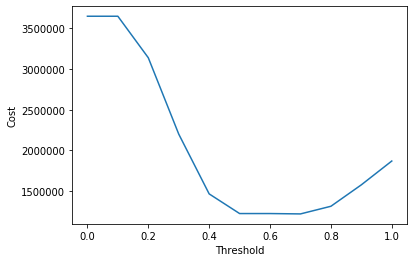

In [330]:
min_cost_threshold(y_test, y_preds)

In [333]:
total_cost(y_test, y_preds, threshold = 0.7)

1220000

In [334]:
trees.feature_importances_

array([0.25604939, 0.10991168, 0.01632549, 0.03360046, 0.07944053,
       0.29024814, 0.03720465, 0.02919041, 0.01509746, 0.00789182,
       0.02451594, 0.00944879, 0.04135127, 0.02294919, 0.00773765,
       0.0063097 , 0.01272744])

In [335]:
list(zip(X_train.columns, trees.feature_importances_))

[('age', 0.25604938603638866),
 ('education', 0.10991167757624902),
 ('previous', 0.01632549014547117),
 ('cons.price.idx', 0.03360046418129359),
 ('cons.conf.idx', 0.07944053118346946),
 ('nr.employed', 0.29024813571741753),
 ('job_admin.', 0.037204650507650025),
 ('job_blue-collar', 0.029190410285808925),
 ('job_entrepreneur', 0.01509745664605872),
 ('job_retired', 0.007891821968115128),
 ('job_services', 0.02451594172707183),
 ('job_student', 0.009448788362544489),
 ('marital_married', 0.04135126654279088),
 ('marital_single', 0.02294918848231526),
 ('poutcome_failure', 0.007737649254542773),
 ('poutcome_nonexistent', 0.006309699377667069),
 ('poutcome_success', 0.012727442005145443)]

### Random Forests

In [336]:
%%time 
rf = RandomForestClassifier(random_state = seed,  class_weight = 'balanced')

parameters = {'n_estimators':[10, 100, 300, 1000]}

clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

Wall time: 3min 5s


In [337]:
y_preds = clf_rf.predict_proba(X_test)[:,1]

clf_rf.score(X_test, y_test)

0.8372177713037144

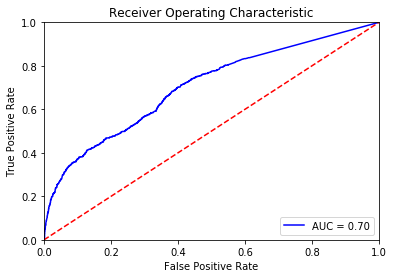

In [338]:
auc_roc_plot(y_test, y_preds)

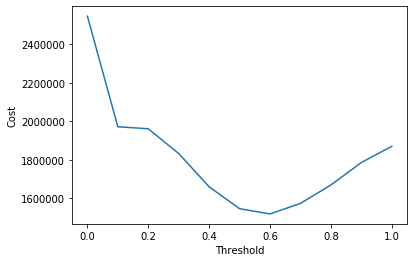

In [339]:
min_cost_threshold(y_test, y_preds)

In [341]:
total_cost(y_test, y_preds, threshold = 0.6)

1519500

### Neural Networks

Uma vez que as neural networks não nos permitirem identificar quais são as features mais relevantes, optou-se por não se utilizar este modelo.

## Perguntas


    1. Quantas features estão disponíveis? Quantos clientes?
    R: Estão disponíveis 16 features e 41188 clientes.
    
    2. Quantos clientes têm no dataset que efectivamente aderiram ao depósito a prazo? E quantos não o fizeram?
    R: Número de clientes que aderiram ao depósito a prazo : 4640. Número de clientes que não aderiram ao depósito a prazo : 36548
    
    3. Quais são as features mais relevantes para decidir se um cliente tem mais propensão para aderir ao depósito a prazo?
    R: De acordo com o nosso modelo (utilizando uma decision tree) as 3 features mais relevantes, por ordem decrescente, são a nr.employed, age e education. 
    
    4. Qual o algoritmo que levou aos melhores resultados?
    R: O algoritmo que levou a melhores resultados foi a decision tree.
    
    5. Qual/Quais as métricas de avaliação que usaram para comparar a performance dos vários modelos? Porquê?
    R: A métrica principal utilizada foi a do custo total do banco calculado da seguinte forma: 500€ x FP + 2000€ x FN.
    Assim temos uma comparação imediata e real da poupança efectiva que cada modelo traz ao banco.
    
    6. Qual é o custo que o banco tem sem nenhum modelo?
    R: O custo que o banco tem assumindo que nenhum cliente abriu depóstio é de 1.870.000€
    
    7. Qual o custo que o banco passa a ter com o vosso modelo?
    R: O custo que o banco passa a ter utilizando o nosso melhor modelo é de 1.220.000€